In [103]:
import numpy as np
import pandas as pd

import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt

In [104]:
survey_df=pd.read_csv('CSCI_1070_survey_results.csv')
#convert everything to lowercase for simplicity reasons
survey_df = survey_df.map(lambda x: x.lower() if isinstance(x, str) else x)
survey_df

,Timestamp,What is your name?,What state/country were you born in?,Are you working while in school?,How much experience do you have programming?,What class are you in?,How many siblings do you have?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?
0,2024/01/29 6:34:23 pm cst,gavin edwards,missouri,yes,6 months - 1 year,freshman,1,i have two dogs both chihuahua mixes.,pasta but fish is a close second.,on campus,no,data science,18,breaking bad,rocket league,the scythe series,its a requirement for the data science major.,ls
1,2024/01/29 6:46:07 pm cst,NaN,"saint louis, missouri",yes,0-3 months,freshman,2,0,hot wings,off campus,no,nursing,19,criminal minds,valorant,a little life by hanya yanaghara,i have an interest in programming. i enjoy lea...,NaN
2,2024/01/29 7:45:39 pm cst,connor love,illinois,no,0-3 months,freshman,1,"i have two golden retrievers, ellie and amber....",mexican.,on campus,no,economics and finance.,19,the wire.,pokémon white 2.,"""surprised by joy"" by c. s. lewis.",transfer course requirements for the universit...,"<git push> by far, too satisfying."
3,2024/01/29 7:47:12 pm cst,liam,missouri,yes,0-3 months,freshman,1,0,vietnamese,off campus,no,biochemistry,18,NaN,NaN,NaN,applicability,NaN
4,2024/01/29 10:45:38 pm cst,aarushi choudhary,japan,yes,0-3 months,freshman,1,no pets,pasta,on campus,yes,health sciences,18,NaN,spiderman 2,NaN,i'm trying to get a minor in data science,ls
5,2024/01/29 10:55:40 pm cst,noel zerai,missouri,yes,0-3 months,freshman,2,none,injera,on campus,no,comp sci,19,on my block,assassins creed origins,kite runner,just as an intro to my desired career.,ls
6,2024/01/29 11:50:50 pm cst,kine thiam,united states,yes,0-3 months,freshman,5+,0,pastaaaaa,on campus,yes,it was pre medicine therefore biology but i de...,18,reign,it takes two,wonder,at first it was to see if i’d like computer sc...,NaN
7,2024/01/30 5:24:37 pm cst,bandar aldhahri,saudi arabia,yes,0-3 months,junior,5+,0,kabsa,off campus,no,criminology and criminal justice and i am plan...,NaN,breaking bad,fifa - soccer,NaN,i am planing to get a master degree in cyberse...,until now is pwd
8,2024/01/31 10:44:53 am cst,aida bah,minnesota,yes,0-3 months,freshman,2,0,gambian food,on campus,yes,computer science,18,NaN,NaN,dead end memories - banana yoshimoto,"for my major, to learn python",tree
9,2024/01/31 6:34:07 pm cst,kevin patel,india,no,0-3 months,senior,0,NaN,italian,off campus,no,finance,21,peaky blinders,warzone,the great gatsby,to learn the basics of python to help me stand...,'cd'


In [105]:
survey_df['What state/country were you born in?']=survey_df['What state/country were you born in?'].map(lambda x: 'missouri' if 'missouri' in x 
                                                                                                        else 'not_missouri_in_us' if 'illinois' in x
                                                                                                        else 'not_missouri_in_us' if 'minnesota' in x
                                                                                                        else 'not_missouri_in_us' if 'georgia' in x
                                                                                                        else 'not_missouri_in_us' if 'new mexico' in x
                                                                                                        else 'outside_us')

In [106]:
survey_df['How old are you?']=survey_df['How old are you?'].astype(str)
survey_df['How old are you?']=survey_df['How old are you?'].map(lambda x: '19' if '19' in x
                                                                else '18' if '18' in x
                                                                else '20' if '20' in x
                                                                else '21') 

In [107]:
survey_df['How many pets and of which kind do you have?']=survey_df['How many pets and of which kind do you have?'].astype(str)
survey_df['How many pets and of which kind do you have?']=survey_df['How many pets and of which kind do you have?'].map(lambda x: 'cats and dogs' if '2 cats' in x
                                                                                                                        else 'dog' if 'chihuahua' in x
                                                                                                                        else 'dog' if 'husky' in x
                                                                                                                        else 'dog' if 'dog' in x
                                                                                                                        else 'cat' if 'maincoon' in x
                                                                                                                        else 'none')

In [108]:
survey_df['What is your favorite type of food?']=survey_df['What is your favorite type of food?'].astype(str)
survey_df['What is your favorite type of food?']=survey_df['What is your favorite type of food?'].map(lambda x: 'some type of beef' if 'burger' in x
                                                                                                        else 'beef' if 'steak' in x
                                                                                                        else 'mexican' if 'mexican' in x
                                                                                                        else 'pasta' if 'pasta' in x
                                                                                                        else x)

In [109]:
survey_df['What is your major?']=survey_df['What is your major?'].astype(str)
survey_df['What is your major?']=survey_df['What is your major?'].map(lambda x: 'computer science' if 'comp' in x
                                                                      else 'data science' if 'data' in x
                                                                      else 'mathematics' if 'math' in x
                                                                      else 'criminology' if 'criminology' in x
                                                                      else 'international business' if 'international business' in x
                                                                      else x)

In [110]:
agg_from=survey_df.groupby('What state/country were you born in?').count()

In [111]:
agg_from

,Timestamp,What is your name?,Are you working while in school?,How much experience do you have programming?,What class are you in?,How many siblings do you have?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?
What state/country were you born in?,,,,,,,,,,,,,,,,,
missouri,10,9,10,10,10,10,10,10,10,10,10,10,9,9,9,10,8
not_missouri_in_us,5,5,5,5,5,5,5,5,5,5,5,5,4,4,5,5,3
outside_us,5,5,5,5,5,5,5,5,5,5,5,5,4,5,3,5,4


<Axes: ylabel='What is your name?'>

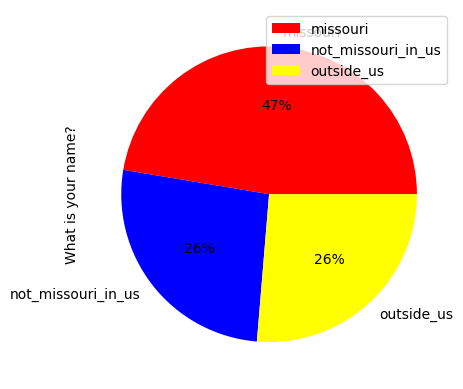

In [112]:
colors=['red', 'blue', 'yellow']
agg_from.plot(kind='pie', y='What is your name?', autopct='%1.0f%%', colors=colors)
#percentage of studetnts from missouri, the us but not missouri, and outside the country

In [113]:
survey_df

,Timestamp,What is your name?,What state/country were you born in?,Are you working while in school?,How much experience do you have programming?,What class are you in?,How many siblings do you have?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?
0,2024/01/29 6:34:23 pm cst,gavin edwards,missouri,yes,6 months - 1 year,freshman,1,dog,pasta,on campus,no,data science,18,breaking bad,rocket league,the scythe series,its a requirement for the data science major.,ls
1,2024/01/29 6:46:07 pm cst,NaN,missouri,yes,0-3 months,freshman,2,none,hot wings,off campus,no,nursing,19,criminal minds,valorant,a little life by hanya yanaghara,i have an interest in programming. i enjoy lea...,NaN
2,2024/01/29 7:45:39 pm cst,connor love,not_missouri_in_us,no,0-3 months,freshman,1,none,mexican,on campus,no,economics and finance.,19,the wire.,pokémon white 2.,"""surprised by joy"" by c. s. lewis.",transfer course requirements for the universit...,"<git push> by far, too satisfying."
3,2024/01/29 7:47:12 pm cst,liam,missouri,yes,0-3 months,freshman,1,none,vietnamese,off campus,no,biochemistry,18,NaN,NaN,NaN,applicability,NaN
4,2024/01/29 10:45:38 pm cst,aarushi choudhary,outside_us,yes,0-3 months,freshman,1,none,pasta,on campus,yes,health sciences,18,NaN,spiderman 2,NaN,i'm trying to get a minor in data science,ls
5,2024/01/29 10:55:40 pm cst,noel zerai,missouri,yes,0-3 months,freshman,2,none,injera,on campus,no,computer science,19,on my block,assassins creed origins,kite runner,just as an intro to my desired career.,ls
6,2024/01/29 11:50:50 pm cst,kine thiam,outside_us,yes,0-3 months,freshman,5+,none,pasta,on campus,yes,computer science,18,reign,it takes two,wonder,at first it was to see if i’d like computer sc...,NaN
7,2024/01/30 5:24:37 pm cst,bandar aldhahri,outside_us,yes,0-3 months,junior,5+,none,kabsa,off campus,no,criminology,21,breaking bad,fifa - soccer,NaN,i am planing to get a master degree in cyberse...,until now is pwd
8,2024/01/31 10:44:53 am cst,aida bah,not_missouri_in_us,yes,0-3 months,freshman,2,none,gambian food,on campus,yes,computer science,18,NaN,NaN,dead end memories - banana yoshimoto,"for my major, to learn python",tree
9,2024/01/31 6:34:07 pm cst,kevin patel,outside_us,no,0-3 months,senior,0,none,italian,off campus,no,finance,21,peaky blinders,warzone,the great gatsby,to learn the basics of python to help me stand...,'cd'


(array([16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

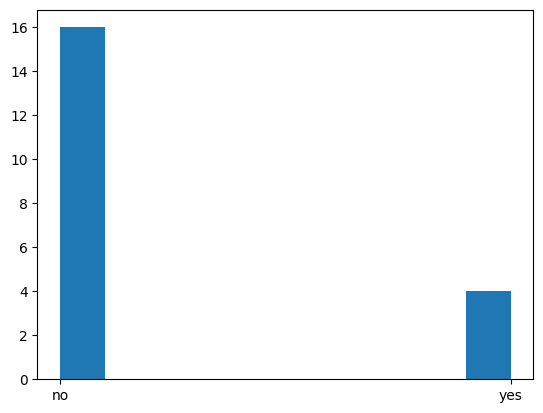

In [114]:
plt.hist(survey_df['Do you take the metro?'])
# number of student who do or do not take the metro

(array([13.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  4.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

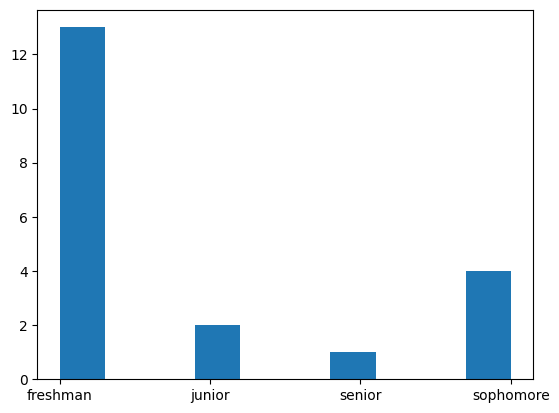

In [115]:
plt.hist(survey_df['What class are you in? '])
# number of students based on their year in school

<Axes: ylabel='What is your name?'>

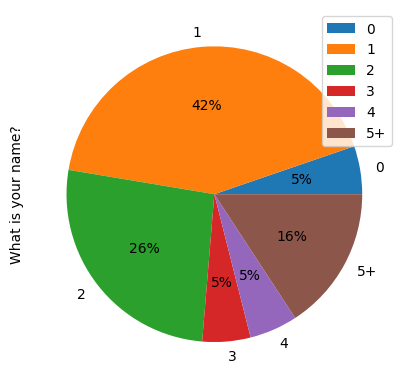

In [116]:
agg_sibs=survey_df.groupby('How many siblings do you have?').count()
agg_sibs.plot(kind='pie', y='What is your name?', autopct='%1.0f%%')
#percentage of studetntsby how many siblings they have

<Axes: ylabel='What is your name?'>

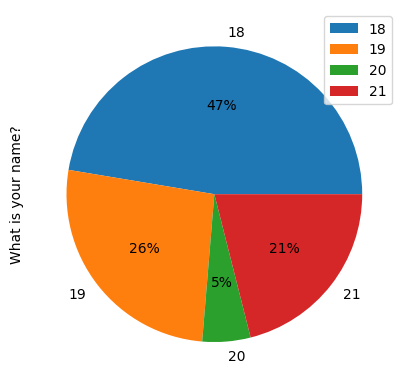

In [117]:
agg_age=survey_df.groupby('How old are you?').count()
agg_age.plot(kind='pie', y='What is your name?', autopct='%1.0f%%')
# percentage of students based on their age